# Understanding K-Means Clustering with Business Data

## Introduction to Clustering and K-Means

Clustering is an unsupervised learning technique used to group similar data points. K-Means is one of the simplest and most widely used clustering algorithms. We are going to explore this concept using a synthetic dataset mimicking customer purchasing behavior in a business context.


## Generate some data

Sometimes it is easier when learning a new concept to generate the data, it also has the nice side effect of keeping this entire notebook self contained. This is obviously not a necessary step in segmentation, it is just to make this example easier to get. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility. If you use this same seed, our results will be the same. 
np.random.seed(1955)

# Generate synthetic data for 1000 customers
num_customers = 1000

# Total_Spend: random spending between $100 and $10,000
total_spend = np.random.uniform(100, 10000, num_customers)

# Frequency: random frequency of purchases between 1 and 100
frequency = np.random.randint(1, 100, num_customers)

# Recency: number of days since the last purchase between 1 and 365
recency = np.random.randint(1, 365, num_customers)

# Create a DataFrame to hold the data
df = pd.DataFrame({
    'Total_Spend': total_spend,
    'Frequency': frequency,
    'Recency': recency
})

# Display the first few rows of the dataset
df.head()


,Total_Spend,Frequency,Recency
0,8981.307874,41,108
1,3037.690462,60,78
2,2719.947050,71,281
3,5572.314520,21,63
4,6103.019045,88,76


Variables in our dataset:

* Total_Spend: Represents how much a customer has spent.
* Frequency: Represents how often they made purchases.
* Recency: Represents how many days ago their last purchase occurred.

## Standardizing the Data

Standardization is important in K-Means clustering because the algorithm is distance-based and sensitive to scale. Do you see how Total_Spend is so much larger than Frequency and Recency? Features like Total_Spend may dominate others if not scaled properly. By standardizing the variables, we ensure that each feature contributes equally to the clustering process.

In [2]:
from sklearn.preprocessing import StandardScaler

# Standardize the data to have mean 0 and variance 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame for better readability
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Display the first few rows of the scaled data
df_scaled.head()


,Total_Spend,Frequency,Recency
0,1.387840,-0.338866,-0.753416
1,-0.700107,0.326264,-1.043031
2,-0.811728,0.711339,0.916701
3,0.190287,-1.039003,-1.187839
4,0.376719,1.306455,-1.062339


## Applying K-Means Clustering

In K-Means, we aim to partition the data into "K" clusters. Each customer will be assigned to the nearest cluster center based on the distance to centroids.

Here we are using K=4 clusters for simplicity, but this number can be adjusted. The Cluster column now indicates the segment each customer belongs to.

In [3]:
from sklearn.cluster import KMeans

# Set number of clusters (K)
k = 4

# Initialize the KMeans model with 4 clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model and predict the clusters
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original data
df['Cluster'] = df_scaled['Cluster']

# Display the first few rows with cluster assignments
df.head()


,Total_Spend,Frequency,Recency,Cluster
0,8981.307874,41,108,0
1,3037.690462,60,78,1
2,2719.947050,71,281,1
3,5572.314520,21,63,2
4,6103.019045,88,76,0


## Visualizing the Clusters

Visualization helps in understanding the separation between clusters. We’ll use a scatter plot to visualize the customer segments based on their Total_Spend and Frequency. Why aren't we using all 3 variables? When you try to visualize more than 2, the visualization is no longer easy to interpret.

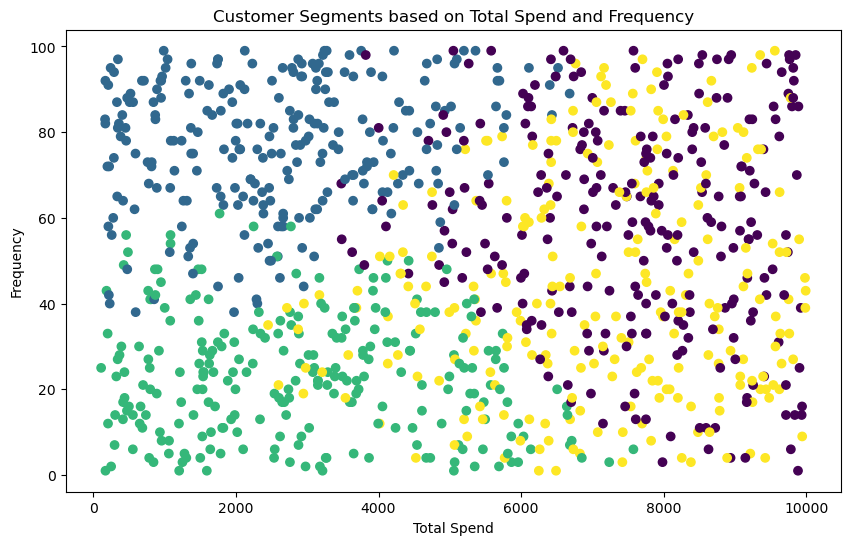

In [4]:
# Plotting Total_Spend vs Frequency, colored by cluster
plt.figure(figsize=(10,6))
plt.scatter(df['Total_Spend'], df['Frequency'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.title('Customer Segments based on Total Spend and Frequency')
plt.show()


(note these clusters were randomly created... if you see these using real data, you probably have some deeper data issues to solve)

## Evaluating the Number of Clusters (K)

We can use methods like the Elbow Method and Silhouette Score to determine the optimal number of clusters. This has the tendency to sound a lot more accurate and specific than it really is. I would encourage you to think about the clusters from a business purpose perspective first, and use that as the primary guideline in how many are useful. 

### Elbow Method

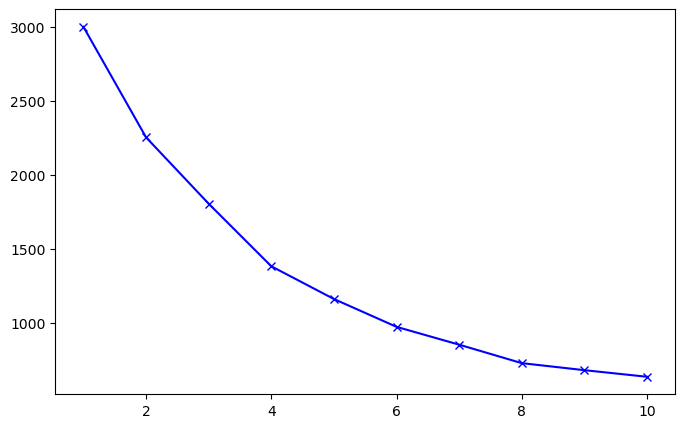

In [5]:
#elbow method
distortions = []
k_range = range(1, 11)

# Calculate distortions for different values of K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled.drop('Cluster', axis=1))
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, distortions, 'bx-')


### Silhouette Scores

For K=2, the silhouette score is 0.240
For K=3, the silhouette score is 0.234
For K=4, the silhouette score is 0.279
For K=5, the silhouette score is 0.280
For K=6, the silhouette score is 0.295
For K=7, the silhouette score is 0.288
For K=8, the silhouette score is 0.290
For K=9, the silhouette score is 0.282
For K=10, the silhouette score is 0.284


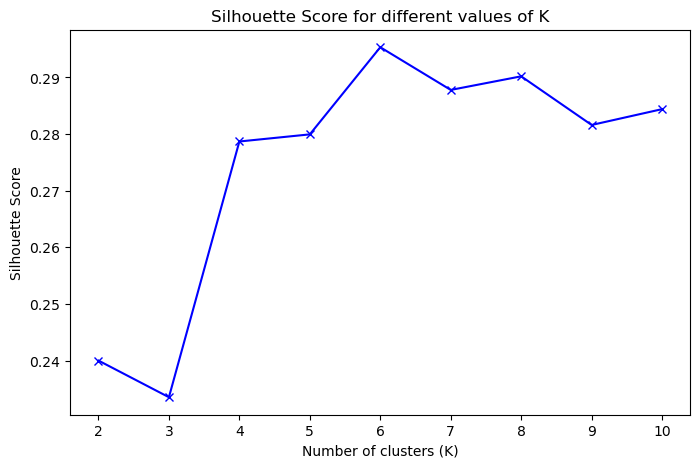

In [6]:
from sklearn.metrics import silhouette_score

# Define a range for K (number of clusters)
k_values = range(2, 11)  # We cannot compute silhouette score for K=1

# List to hold the silhouette scores
silhouette_scores = []

# Loop through the K values to compute silhouette score for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled.drop('Cluster', axis=1))  # Drop the 'Cluster' column if it exists from previous runs
    
    # Predict cluster labels
    cluster_labels = kmeans.predict(df_scaled.drop('Cluster', axis=1))
    
    # Calculate silhouette score
    score = silhouette_score(df_scaled.drop('Cluster', axis=1), cluster_labels)
    silhouette_scores.append(score)
    print(f"For K={k}, the silhouette score is {score:.3f}")

# Plot the silhouette scores for each K value
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different values of K')
plt.show()


**silhouette_score function:**

The function from sklearn.metrics calculates how similar a point is to its own cluster compared to other clusters. This is used to evaluate clustering performance.

**Looping through different K values:**

The program tests different values of K (from 2 to 10) because we cannot calculate the silhouette score for K=1 (there's no inter-cluster comparison possible with a single cluster).

**Fitting K-means for each K:**

For each K, we fit the K-Means algorithm and calculate the silhouette score based on the resulting cluster assignments.

**Plotting the silhouette scores:**

After calculating the silhouette scores for each K, we plot them to identify the value of K that yields the highest silhouette score, which suggests that the clusters are well-separated.

**Interpreting the Results:**

Highest Silhouette Score: The value of K that has the highest silhouette score typically indicates the optimal number of clusters. A higher score means better-defined clusters.

What to look for: You’re looking for the K where the silhouette score peaks. This indicates that the clusters are well-separated and cohesive.

Warning: As before, treat these carefully. Most people have a tendency to over rely on this. At this stage in a clustering analysis it is usually better to go back to the question/problem you were trying to solve for. Consider the implications of different values of K before blindly going down this route.

## Business Interpretation

In [7]:
# Generate descriptive statistics pivoted on 'Cluster'
descriptive_stats_by_cluster = df.groupby('Cluster').agg({
    'Total_Spend': ['mean'], #you can use different stats ['mean', 'min', 'max', 'std']
    'Frequency': ['mean'],
    'Recency': ['mean']
})
descriptive_stats_by_cluster

,Total_Spend,Frequency,Recency
,mean,mean,mean
Cluster,,,
0,7583.859093,58.492126,95.468504
1,2616.400516,76.881890,210.775591
2,2922.529501,23.167331,151.517928
3,7079.740172,43.485477,291.394191


### Example Cluster Interpretations:

#### Cluster 0: High Spenders, Frequent Buyers
* Total_Spend: High
* Frequency: High
* Recency: Low (customers purchased recently)

**Possible Interpretation:** This segment represents your most valuable customers. They buy frequently, spend a lot, and have made purchases recently. These customers could be targeted for loyalty programs or VIP promotions.

#### Cluster 1: Low Spenders, Frequent Buyers

* Total_Spend: Low
* Frequency: High (they come in often)
* Recency: High (customers haven't purchased recently)

**Possible Interpretation:** This group consists of disengaged or inactive customers. They used to buy often, don’t spend much, and haven’t purchased recently. A reactivation campaign (like discounts or targeted ads) could be effective.

#### Cluster 2: Low Spenders, Infrequent Buyers

* Total_Spend: Low
* Frequency: Low
* Recency: Moderate (customers haven't purchased very recently)

**Possible Interpretation:** These customers spend very little when they do make purchases, but they don't buy often. Consider targeting them with special offers to increase their purchase frequency. These might not be customers worth targeting for this business. 

#### Cluster 3: High Spenders, Infrequent Buyers

* Total_Spend: High
* Frequency: Moderate
* Recency: Very High (It has been a long time since they purchased)

**Possible Interpretation:** These customers don't buy frequently, and have not been in for a long time, but they do spend a lot. Consider diving more into what these customers buy, maybe it is items that do not require frequent replacement (think about Best Buy customers who buy applicances for example). This group probably has very tailored and specific targeting/marketing requirements. 

#### What else might we consider? 

* Marketing and Sales Strategy: You can tailor different marketing strategies for each cluster. For instance, high-frequency buyers could be given bulk discounts, while high-spenders but infrequent buyers could be targeted with special offers aimed at increasing their purchase frequency.
* Retention Efforts: Identifying disengaged customers (those with high Recency) helps target retention campaigns. You could offer these customers incentives, such as personalized discounts or special offers.
* VIP or Loyalty Programs: The most frequent or high-spending customers could be offered VIP membership, exclusive sales, or loyalty rewards.

**Always** factor in domain knowledge or other business-specific criteria when interpreting clusters. The characteristics of each segment should make sense within your business context.

Reassess K: You might revisit your choice of K if the clusters don’t yield meaningful insights or if the silhouette score suggests that a different K might better capture distinct segments.

